In [46]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
sleep_quality <- read_csv("data/sleep_quality.csv", skip = 1, col_names = FALSE)|>
    rename(ID = X1) |>
    rename(gender = X2) |>
    rename(age = X3) |>
    rename(occupation = X4) |>
    rename(sleep_duration = X5) |>
    rename(sleep_quality = X6) |>
    rename(physical_activity_level = X7) |>
    rename(stress_level = X8) |>
    rename(bmi_category = X9) |>
    rename(blood_pressure = X10) |>
    rename(heart_rate = X11) |>
    rename(daily_steps = X12) |>
    rename(sleep_disorder = X13)
sleep_quality 

Rows: 374 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): X2, X4, X9, X10, X13
dbl (8): X1, X3, X5, X6, X7, X8, X11, X12

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [57]:
sleep_split <- initial_split(sleep_quality, prop = 0.75, strata = sleep_disorder)
sleep_training <- training(sleep_split)   
sleep_testing <- testing(sleep_split)

sleep_training
sleep_testing

sleep_summary <- sleep_training |>
    group_by(sleep_disorder) |>
    summarise(average_sleep = mean(sleep_duration), average_physical_activity = mean (physical_activity_level))
sleep_summary

ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
19,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Insomnia
32,Female,30,Nurse,6.4,5,35,7,Normal Weight,130/86,78,4100,Insomnia
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


ID,gender,age,occupation,sleep_duration,sleep_quality,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
362,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


sleep_disorder,average_sleep,average_physical_activity
<chr>,<dbl>,<dbl>
Insomnia,6.608772,48.33333
None,7.382927,58.40854
Sleep Apnea,7.175862,78.48276


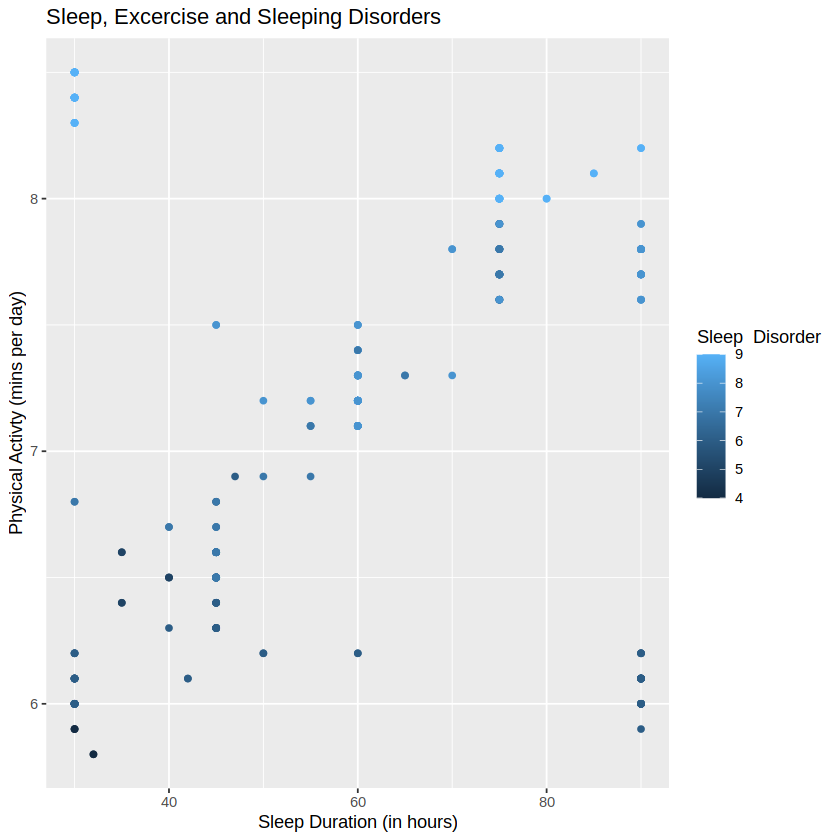

In [58]:
sleep_quality_plot <- sleep_quality |>
    ggplot(aes(x = physical_activity_level, y = sleep_duration, color = sleep_quality)) +
    geom_point() +
    labs(x= "Sleep Duration (in hours)", y = "Physical Activty (mins per day)", 
         color = "Sleep  Disorder", title = "Sleep, Excercise and Sleeping Disorders")
sleep_quality_plot